# TFM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

# Extrayendo muestra

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

In [9]:
datos_sample.to_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv",index = False)

# Limpiando datos

In [9]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [10]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [11]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [12]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [13]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [14]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [15]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [16]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

In [17]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

In [18]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        216.309509
std        7537.267374
min      -86382.000000
25%         377.000000
50%         650.000000
75%        1117.000000
max       86119.000000
Name: time_duration, dtype: float64

In [19]:
datos_sample = datos_sample[datos_sample["time_duration"] > 0]
datos_sample = datos_sample[datos_sample["time_duration"] <= 10800]

In [20]:
datos_sample.shape

(868910, 32)

(array([   942.,   2362.,   3157.,   3714.,   8873.,  87066., 329517.,
        327983.,  99153.,   6143.]),
 array([0.        , 0.92761281, 1.85522562, 2.78283843, 3.71045125,
        4.63806406, 5.56567687, 6.49328968, 7.42090249, 8.3485153 ,
        9.27612811]),
 <a list of 10 Patch objects>)

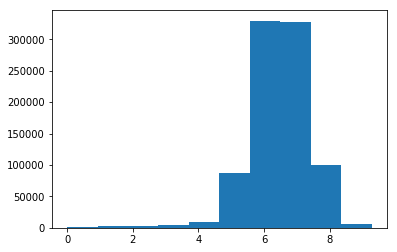

In [21]:
plt.hist(np.log(datos_sample["time_duration"]))

In [ ]:
#location_pickup = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zone_lookup.csv")
#location_pickup.columns = ["PULocationID","borough_pickup","zone_pickup","service_zone_pickup"]
#location_dropoff = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zone_lookup.csv")
#location_dropoff.columns = ["DOLocationID","borough_dropoff","zone_dropoff","service_zone_dropoff"]

In [ ]:
#datos_sample1 = datos_sample.merge(location_pickup)
#datos_sample1 = datos_sample1.merge(location_dropoff)

In [23]:
datos_sample2 = datos_sample[["key","VendorID","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","trip_type","hora_pickup","time_duration","dayofweek","dayofmonth","month","total_amount"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"

In [24]:
datos_sample2.isnull().sum()

key                   0
VendorID              0
store_and_fwd_flag    0
RatecodeID            0
PULocationID          0
DOLocationID          0
passenger_count       0
trip_distance         0
payment_type          0
trip_type             0
hora_pickup           0
time_duration         0
dayofweek             0
dayofmonth            0
month                 0
total_amount          0
dtype: int64

In [30]:
datos_sample2.head()

,key,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,hora_pickup,time_duration,dayofweek,dayofmonth,month,total_amount
3508946,3508946,2,0,1,28,82,1,3.20,2,1.0,13.0,779,5,12,5,13.8
1824374,1824374,2,0,1,75,74,1,0.83,2,1.0,13.0,182,5,10,3,5.3
540119,540119,2,0,1,75,239,1,2.10,2,1.0,14.0,503,0,22,1,9.3
1138804,1138804,2,0,1,192,173,1,2.64,2,1.0,13.0,680,1,13,2,11.3
6067477,6067477,2,0,1,225,97,1,2.39,1,1.0,8.0,955,4,31,8,12.8


In [89]:
datos_sample2["total_amount"].describe()

count    868910.000000
mean         15.700240
std          16.751209
min        -147.000000
25%           8.300000
50%          11.800000
75%          18.800000
max       10528.750000
Name: total_amount, dtype: float64

In [74]:
datos_sample3 = datos_sample2[datos_sample2["total_amount"] > 1]
datos_sample3 = datos_sample3[datos_sample3["total_amount"] <= 100]

# Escalando variables

In [26]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [31]:
datos_sample2.columns

Index(['key', 'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'hora_pickup', 'time_duration', 'dayofweek', 'dayofmonth',
       'month', 'total_amount'],
      dtype='object')

In [104]:
X_num = datos_sample3.drop(["key","trip_distance","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'payment_type',
                    'trip_type', 'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [106]:
X = X_scaled
y = datos_sample3["total_amount"]

(array([403215., 286826.,  94222.,  38897.,  18977.,  11263.,   6154.,
          2936.,   1299.,    595.]),
 array([  1.3 ,  11.17,  21.04,  30.91,  40.78,  50.65,  60.52,  70.39,
         80.26,  90.13, 100.  ]),
 <a list of 10 Patch objects>)

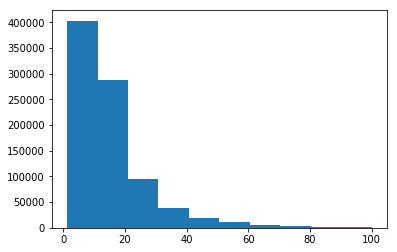

In [77]:
plt.hist(datos_sample3["total_amount"])

# Particion train-test

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

# Modelo

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [108]:
mod_rf = rf.fit(X_train,y_train)

In [109]:
pred_rf = mod_rf.predict(X_test)

# Metricas de modelo

In [110]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

3.6459489622335233

In [111]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

25.11863387755916

In [112]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rf)

0.8343890260466227

# Importancia de variables

In [113]:
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [114]:
feature_importances

,importance
PULocationID,0.336820
DOLocationID,0.320388
payment_type,0.084996
hora_pickup,0.061242
RatecodeID,0.053019
dayofmonth,0.052448
month,0.039602
dayofweek,0.032337
passenger_count,0.011225
VendorID,0.006887
